# Introduction to Computer Vision - Lab 05

## Task 1

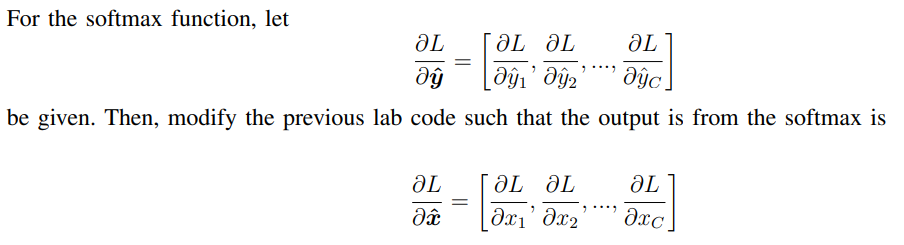

In [1]:
import numpy as np

In [2]:
class SoftMax:

    def __init__(self):
        self.y_hat = None  # output of forward propagation
        self.grad = None  # gradient with respect to the input values (result of backward propagation)

    def forward(self, x):
        # calculate output of the softmax function
        e_x = np.exp(x)
        self.y_hat = e_x / e_x.sum(axis=0)
        return self.y_hat

    def backward(self, loss_grad):
        # compute gradients
        y_hat_i_y_hat_j = self.y_hat * np.reshape(self.y_hat, (-1, 1))
        softmax_der = np.diag(self.y_hat) - y_hat_i_y_hat_j  # derivative of softmax
        self.grad = np.dot(softmax_der, loss_grad)
        return self.grad

*The softmax derivative reference: [link](https://stats.stackexchange.com/a/328095)

Let's use some example to compare the results of my implementation with torch results:



In [3]:
# try an example and compare my implementation with the torch results
print('Using numpy:')

softmax = SoftMax()
# define some input values for x
x = np.array([3.0, 4.0, 1.0, 2.0])
# define gradient of loss
L_grad = np.zeros(x.shape[0])
L_grad[np.argmax(x)] = 1

# perform forward propagation over the softmax and display the result
forward_result = softmax.forward(x)
print(f'Forward propagation result: {forward_result}')

# perform backward propagation over the softmax and display the result
backward_result = softmax.backward(L_grad)
print(f'Backward propagation result: {backward_result}')

# comparison with the torch results
print('\nUsing torch:')

import torch
import torch.nn.functional as F

# perform forward propagation over the softmax
x_tensor = torch.tensor(x, requires_grad=True)
forward_result_t = F.softmax(x_tensor, dim=0)
print(f'Forward propagation result: {forward_result_t.detach().numpy()}')

# perform backward propagation
L_grad_tensor = torch.tensor(L_grad)
torch.autograd.backward(forward_result_t, L_grad_tensor)
backward_result_t = x_tensor.grad
print(f'Backward propagation result: {backward_result_t.detach().numpy()}')

Using numpy:
Forward propagation result: [0.23688282 0.64391426 0.0320586  0.08714432]
Backward propagation result: [-0.15253222  0.22928869 -0.02064299 -0.05611347]

Using torch:
Forward propagation result: [0.23688282 0.64391426 0.0320586  0.08714432]
Backward propagation result: [-0.15253222  0.22928869 -0.02064299 -0.05611347]


As it was obtained, the results are the same.

## Task 2

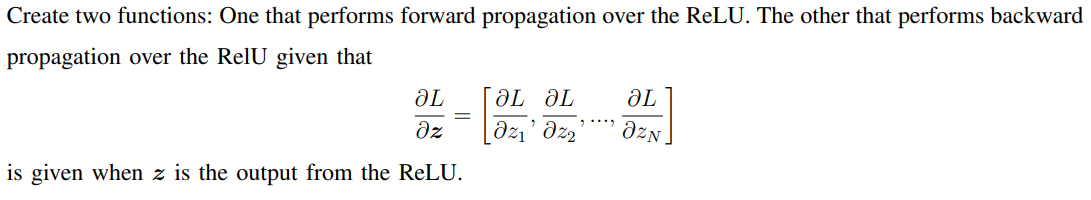

In [4]:
class ReLU:

    def __init__(self):
        self.x = None  # input values

    def forward(self, x):
        # calculate output of relu function
        self.x = x
        return np.maximum(0, self.x)

    def backward(self, loss_grad):
        # compute gradients with respect to the input values
        relu_der = np.where(self.x < 0, 0, 1) # local gradient of relu
        grad = relu_der * loss_grad
        return grad

Let's compare the results of the implementation with torch on the example from Lecture 5 (slide 11):

In [5]:
# try an example and compare my implementation with the torch results
print('Using numpy:')

relu = ReLU()
x = np.array([1.0, -2.0, 3.0, -1.0])
L_grad = np.array([4.0, -1.0, 5.0, 9.0])

# perform forward propagation over the relu and display the result
forward_result = relu.forward(x)
print(f'Forward propagation result: {forward_result}')

# perform backward propagation
backward_result = relu.backward(L_grad)
print(f'Backward propagation result: {backward_result}')

# comparison with the torch results
print('\nUsing torch:')
import torch
import torch.nn.functional as F

# perform forward propagation over the relu
x_tensor = torch.tensor(x, requires_grad=True)
forward_result_t = F.relu(x_tensor)
print(f'Forward propagation result: {forward_result_t.detach().numpy()}')

# perform backward propagation
L_grad_tensor = torch.tensor(L_grad)
torch.autograd.backward(forward_result_t, L_grad_tensor)
backward_result_t = x_tensor.grad
print(f'Backward propagation result: {backward_result_t.detach().numpy()}')

Using numpy:
Forward propagation result: [1. 0. 3. 0.]
Backward propagation result: [ 4. -0.  5.  0.]

Using torch:
Forward propagation result: [1. 0. 3. 0.]
Backward propagation result: [4. 0. 5. 0.]


As can be seen, the results are the same.

## Task 3

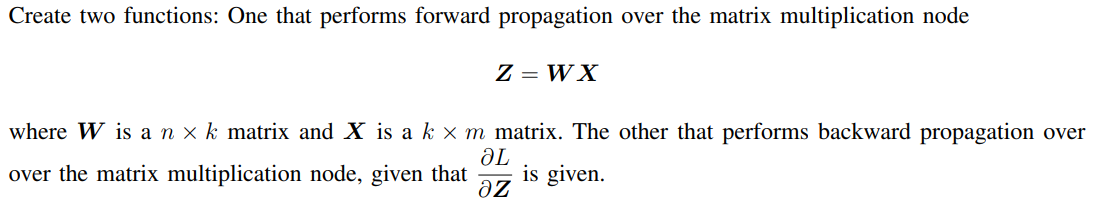

In [6]:
class MatMulNode:

    def __init__(self):
        self.w = None  # input matrix W
        self.x = None  # input matrix X

    def forward(self, w, x):
        # calculate output of matrix multiplication W*X
        self.w = w
        self.x = x
        return np.matmul(self.w, self.x)

    def backward(self, dL_dz):
        # compute gradient with respect to W
        dz_dw = np.transpose(self.x)
        dL_dw = np.matmul(dL_dz, dz_dw)
        return dL_dw

Let's test the implementation and compare with torch results on some random example:

In [7]:
# try an example and compare my implementation with the torch results
print('Using numpy:')

# some random example
n, k, m = 4, 3, 2
w = np.random.randn(n, k)
x = np.random.randn(k, m)
dL_dZ = np.random.randn(n, m)

# perform forward propagation
matmul = MatMulNode()
forward_result = matmul.forward(w, x)
print(f'Forward propagation result:\n {forward_result}')

# perform backward propagation
backward_result = matmul.backward(dL_dZ)
print(f'Backward propagation result (gradient with respect to W):\n {backward_result}')

# comparison with the torch results
print('\nUsing torch:')
import torch
import torch.nn.functional as F

# perform forward propagation over the softmax
x_tensor = torch.tensor(x)
w_tensor = torch.tensor(w, requires_grad=True)
forward_result_t = torch.matmul(w_tensor, x_tensor)
print(f'Forward propagation result:\n {forward_result_t.detach().numpy()}')

# perform backward propagation
grad_tensor = torch.tensor(dL_dZ)
torch.autograd.backward(forward_result_t, grad_tensor)
backward_result_t = w_tensor.grad
print(f'Backward propagation result (gradient with respect to W):\n {backward_result_t.detach().numpy()}')

Using numpy:
Forward propagation result:
 [[-0.1190964   0.58421431]
 [ 1.11350208  0.22927721]
 [ 0.90897188  0.69691867]
 [ 0.50580539  1.29823079]]
Backward propagation result (gradient with respect to W):
 [[ 0.89935326  0.13721059 -0.20032433]
 [-1.40968296 -0.23796637  0.25527396]
 [ 0.24056782  0.12636155  0.17635974]
 [-0.31894995  0.27126551  0.89154366]]

Using torch:
Forward propagation result:
 [[-0.1190964   0.58421431]
 [ 1.11350208  0.22927721]
 [ 0.90897188  0.69691867]
 [ 0.50580539  1.29823079]]
Backward propagation result (gradient with respect to W):
 [[ 0.89935326  0.13721059 -0.20032433]
 [-1.40968296 -0.23796637  0.25527396]
 [ 0.24056782  0.12636155  0.17635974]
 [-0.31894995  0.27126551  0.89154366]]


The results obtained are the same.